In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [2]:
raw_data = pd.read_csv('data/Dummies.csv')

In [4]:
raw_data.head(3)

SAT   GPA Attendance
0  1714  2.40         No
1  1664  2.52         No
2  1760  2.54         No

In [6]:
raw_data.tail(2)

SAT   GPA Attendance
82  1962  3.76        Yes
83  2050  3.81        Yes

In [7]:
raw_data.Attendance.unique()

array(['No', 'Yes'], dtype=object)

In [8]:
data = raw_data.copy()

In [9]:
data['NewAttendance'] = data.Attendance.map({'No':0, 'Yes':1})

In [10]:
data.head(3)

SAT   GPA Attendance  NewAttendance
0  1714  2.40         No              0
1  1664  2.52         No              0
2  1760  2.54         No              0

In [11]:
y = data.GPA
x = data.SAT
x = sm.add_constant(x)
result = sm.OLS(y, x).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GPA   R-squared:                       0.406
Model:                            OLS   Adj. R-squared:                  0.399
Method:                 Least Squares   F-statistic:                     56.05
Date:                Fri, 29 Jan 2021   Prob (F-statistic):           7.20e-11
Time:                        11:32:52   Log-Likelihood:                 12.672
No. Observations:                  84   AIC:                            -21.34
Df Residuals:                      82   BIC:                            -16.48
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2750      0.409      0.673      0.503      -0.538       1.088
SAT            0.0017      0.000      7.487      0.000       0.001       0.002
==============================================================================
Omnibus:                       12.839   Durbin-Watson:                   0.950
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               16.155
Skew:                          -0.722   Prob(JB):                     0.000310
Kurtosis:                       4.590   Cond. No.                     3.29e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.29e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [12]:
y = data.GPA
x = data[['SAT', 'NewAttendance']]
x = sm.add_constant(x)
result2 = sm.OLS(y, x).fit()
result2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GPA   R-squared:                       0.565
Model:                            OLS   Adj. R-squared:                  0.555
Method:                 Least Squares   F-statistic:                     52.70
Date:                Fri, 29 Jan 2021   Prob (F-statistic):           2.19e-15
Time:                        11:34:26   Log-Likelihood:                 25.798
No. Observations:                  84   AIC:                            -45.60
Df Residuals:                      81   BIC:                            -38.30
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.6439      0.358      1.797      0.076      -0.069       1.357
SAT               0.0014      0.000      7.141      0.000       0.001       0.002
NewAttendance     0.2226      0.041      5.451      0.000       0.141       0.304
==============================================================================
Omnibus:                       19.560   Durbin-Watson:                   1.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.189
Skew:                          -1.028   Prob(JB):                     1.25e-06
Kurtosis:                       4.881   Cond. No.                     3.35e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.35e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### GPA = 0.0018*SAT
#### GPA = 0.2750+0.0017*SAT
#### GPA = 0.6439+0.0014*SAT +0.2226*Attendance

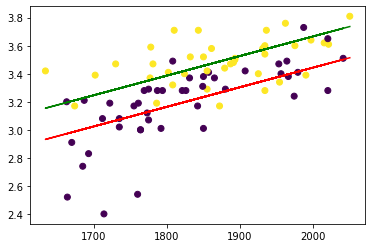

In [23]:
GPA = 0.6439+0.0014*data.SAT +0.2226*data.NewAttendance
plt.scatter(data.SAT, data.GPA, c=data.NewAttendance)
GPA_yes = 0.8665+0.0014*data.SAT 
GPA_no = 0.6439+0.0014*data.SAT
plt.plot(data.SAT, GPA_yes, c='green')
plt.plot(data.SAT, GPA_no, c='red')

In [31]:
new_data1 = pd.DataFrame({'const':1, 'SAT':[1700,1800,1900]})
new_data1 = new_data1.rename(index={0:'철수',1:'영희',2:'길동'})
result.predict(new_data1)

철수    3.089710
영희    3.255279
길동    3.420848
dtype: float64

In [32]:
new_data2 = pd.DataFrame({'const':1, 'SAT':[1700,1800,1900], 'NewAttendance':[1,0,1]})
new_data2= new_data2.rename(index={0:'철수',1:'영희',2:'길동'})
result2.predict(new_data2)

철수    3.246157
영희    3.163493
길동    3.526118
dtype: float64

0.8665